   # 📜 Analytical Project 📜 | E - COMMERCE |

   #### owner: Golovin Alexey
   
***

### Project Task

1. How many users have made a single purchase?

2. On average, how many orders are not delivered due to various reasons (Make a detailed breakdown of reasons)? 

3. For each product, determine the day of the week on which the product is most frequently bought

4. What is the average number of purchases per customer per week (in month)? Please note that within a month, the number of weeks may not be a whole number. For example, November 2021 had 4.28 weeks

5. Using pandas, perform a cohort analysis of customers for the period from January to December and identify the cohort(s) with the highest retention for the 3rd month.

6. "Frequently, for high-quality analysis of audience, segmentation-based methods are used. Use Python to perform RFM segmentation of customers in order to make a high-quality evaluation of the audience. For clustering, you can use the following metrics: R (Recency) - time elapsed since the last purchase before the current date, F (Frequency) - total number of purchases made over time, and M (Monetary) - total amount spent over time.

### List of datasets:

<b>olist_customers_datase.csv</b> — dataset of unique customer <br>
<i>customer_id </i> — id of customer for each order <br> 
<i>customer_unique_id </i> —  unique id of customer <br>
<i>customer_zip_code_prefix </i>—  zip-code  <br>
<i>customer_city </i> —  city of delivery <br>
<i>customer_state</i> —  state of delivery <br>

<b>olist_orders_dataset.csv </b> —  orders dataset <br>
<i>order_id</i> —  unique order id (check) <br>
<i>customer_id</i> —  id of customer for each order <br>
<i>order_status</i> —  order status <br>
<i>order_purchase_timestamp</i> —  time/date of purchase <br>
<i>order_approved_at</i> —  time/date of approving order <br>
<i>order_delivered_carrier_date</i> — time/date of issuance for logistic-partner <br>
<i>order_delivered_customer_date</i> — time/date of delivery <br>
<i>order_estimated_delivery_date</i> — estimated_delivery time/date  <br>

<b>olist_order_items_dataset.csv</b> —  items in order <br>
<i>order_id</i> —  unique order id (check) <br>
<i>order_item_id</i> —  id inside one order <br>
<i>product_id</i> —  product id (barcode) <br>
<i>seller_id</i> — id of distributor <br>
<i>shipping_limit_date</i> —  maximum date for delivery, before order will be giving to logistic-partner <br>
<i>price</i> —  price per unit <br>
<i>freight_value </i> — weight of product <br>


Example of structure of data, you can visualise on <b>order_id</b> == `00143d0f86d6fbd9f9b38ab440ac16f5`  <br>


Unique statuses for orders in dataset *olist_orders_dataset*: <br>

* created  <br>
* approved  <br>
* invoiced  <br>
* processing <br>
* shipped <br>
* delivered <br>
* unavailable <br>
* canceled<br>


At first, I will add a block with library imports, then I will load the datasets and perform exploratory data analysis (EDA)


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import datetime as dt

In [2]:
# Switching warning off
import warnings
warnings.filterwarnings("ignore")

I will read the datasets and assign names, and while reading the **'orders'** and **'items'** datasets, I will change the date format to **'datetime'**.

In [3]:
url_customers = './olist_customers_dataset.csv'
url_items = './olist_order_items_dataset.csv'
url_orders = './olist_orders_dataset.csv'

customers = pd.read_csv(url_customers)
items = pd.read_csv(url_items, parse_dates=['shipping_limit_date'])
orders = pd.read_csv(url_orders, parse_dates=['order_purchase_timestamp', 
                                              'order_approved_at',
                                              'order_delivered_carrier_date',
                                              'order_delivered_customer_date',
                                              'order_estimated_delivery_date']
                    )

Let's delve into our datasets and check for missing values or interesting insights upon first glance

In [4]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
customers.isna().sum()   #using .isna to check number of missing values in columns

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers.nunique()   # this method return number of unique values

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

As we see: total value of customers = **96 096**

In [8]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [9]:
items.describe()   # The describe() function displays descriptive statistics for numerical columns"

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [10]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [11]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [12]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [13]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [14]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [15]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [16]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
pd.unique(orders['order_status']) # check unique status of orders

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [18]:
orders.order_status.unique()  # second way to check unique values in columns

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

## 1. How many users have made a single purchase?


Merge customers dataframe with orders, and assign variable:

In [19]:
customers_and_orders = customers.merge(orders, how = 'inner', on = 'customer_id') 
customers_and_orders.head(3)

# with method .merge, in parameters choose type of join and column or index level names to join on

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


It's reasonable decision to consider only that 'purchase' will be the orders with status "delivered", and have a date in column order_delivered_customer_date. As a full cycle of deal.

In [20]:
customers_and_orders[['customer_unique_id','order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] \
                    .groupby('order_status',as_index = False) \
                    .count()

,order_status,customer_unique_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
0,approved,2,2,0,0
1,canceled,625,484,75,6
2,created,5,0,0,0
3,delivered,96478,96464,96476,96470
4,invoiced,314,314,0,0
5,processing,301,301,0,0
6,shipped,1107,1107,1107,0
7,unavailable,609,609,0,0


In [21]:
buy = customers_and_orders \
                    .fillna(0) \
                    .query('order_status == "delivered"') \
                    .query('order_delivered_customer_date != 0') 
# filtering orders with status "delivered" and droping orders with empty date of delivery

Consider the number of buyers with orders equal to 1

In [22]:
buy.groupby('customer_unique_id', as_index = False) \
   .agg({'order_status': 'count'}) \
   .query('order_status == 1') \
   .nunique()

customer_unique_id    90549
order_status              1
dtype: int64

Answer - **90 549** customers, who made a single purchase.

## 2. On average, how many orders are not delivered due to various reasons (Make a detailed breakdown of reasons)?

Of all the order statuses available in the dataset, the **"canceled"** and **"unavailable"** statuses are the most suitable for the category of **"not delivered"**. All others statuses in one way or another precede the successful completion of the order delivery (or its cancellation) - accordingly, their value calculation is not taken.

First, let's look at the range of values in the order creation date column. To do this, we'll use the **max()** and **min()** functions.

In [23]:
print('Orders from {} to {}'.format(orders['order_purchase_timestamp'].min(),  # shows minimum value
                                    orders['order_purchase_timestamp'].max())) # shows maximum value

Orders from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


As we can see, the first and last months in this dataset are incomplete. In order to perform correct monthly analysis, it is necessary to remove these incomplete data and only consider full months.

In [24]:
orders_month = orders[(orders['order_purchase_timestamp'] > '2016-10-01') & (orders['order_purchase_timestamp'] < '2018-09-30')]

In [25]:
orders_month['order_purchase_timestamp'] = orders_month.order_purchase_timestamp.dt.strftime('%Y-%m') 

# We use the dt.strftime method from the datetime library to transform the date format. 
# We need to remove the day data, leaving only the year and month


Let's check

In [26]:
orders_month['order_purchase_timestamp'].max()

'2018-09'

In [27]:
undelivered = (orders_month[orders_month["order_status"]
                .isin(["unavailable", "canceled"])]
                .groupby(['order_purchase_timestamp', 'order_status'], as_index = False) 
                .agg({'order_id': 'count'}) 
                .groupby('order_status') 
                .agg({'order_id': 'mean'}) 
                .rename(columns={'order_id':'avg'}) 
                .sort_values('avg', ascending=False)
              )
'''
1 We filter the necessary statuses using the isin() method.
2 We group by 2 columns, one of which must be order_status.
3 We count the number of values to determine the total number of orders by status.
4 Finding the mean and displaying the value after sorting in descending order
'''
undelivered

,avg
order_status,
unavailable,29.000000
canceled,28.136364


## 3. For each product, determine the day of the week on which the product is most frequently bought


To answer this question, I will use data from two datasets - one with information about products and one with information about orders (as it contains information about the order date). We will merge the two datasets into one and then convert the order creation date to the name of the day of the week.

In [28]:
orders_items = items.merge(orders, on = 'order_id') #объеденим таблицы с помощью .merge()


Next, we will take a closer look at the information stored in the data for one order with a large number of products, by filtering by the **order number** in the **"order_id"** column. As we can see, each individual product purchase (even if it is the same product in the order) is recorded in a separate row, so each row represents 1 item of the product. To make the calculations correct, I added a column with the number 1.

In [29]:
orders_items.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28


In [30]:
orders_items['purchases'] = 1 

The purchase date is represented in the column "order_purchase_timestamp". We can convert it to the corresponding day names using the "dt.day_name" attribute of the datetime object, and store the data in a new column called "day".

In [31]:
orders_items['day'] = orders_items['order_purchase_timestamp'].dt.day_name()
orders_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchases,day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,Sunday


To find the maximum quantity of products purchased per day, you can use the **groupby()** function followed by the **nlargest()** method.





In [32]:
day_of_week = (orders_items
               .groupby(['product_id','day']) #группируем по 2 столбцам которые нас интересуют 
               .purchases.sum()  #суммируем по столбцу purchases для общей суммы по товару 
               .groupby(['product_id'])
               .nlargest(1) #параметр 1 указывает на количество строк, выводимой функцией, с наибольшим значением
              )

Output the obtained series with data on the quantity of purchased goods indicating the day of the week

In [33]:
day_of_week.sort_values(ascending = False).reset_index(level=[1,2]).head(10).reset_index(drop=True) 
#использовал функцию reset_index чтобы MultiIndex series конвертировать в датафрейм и убрать дублирующиеся столбцы

,product_id,day,purchases
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,368c6c730842d78016ad823897a372db,Friday,67
5,389d119b48cf3043d311335e499d9c6b,Thursday,67
6,53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
7,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,64
8,3dd2a17168ec895c781a9191c1e95ad7,Wednesday,54
9,a62e25e09e05e6faf31d90c6ec1aa3d1,Thursday,50


## 4. What is the average number of purchases per customer per week (in month)? Please note that within a month, the number of weeks may not be a whole number. For example, November 2021 had 4.28 weeks


In this task i will use dataset maded early with joined data of orders and customers - **customers_and_orders**

In [34]:
customers_and_orders.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


In [35]:
customers_and_orders2 = customers_and_orders[(customers_and_orders['order_purchase_timestamp'] > '2016-10-01') \
                                           & (customers_and_orders['order_purchase_timestamp'] < '2018-09-30')]

#отсекаем данные за неполный месяцы по аналогии со вторым заданием

I will make a column **month** for grouping dataframe. This will be needed for count number of orders by month for each customer.

In [36]:
customers_and_orders2['month'] = customers_and_orders2.order_purchase_timestamp.to_numpy().astype('datetime64[M]') 

In [37]:
customers_and_orders2 = (customers_and_orders2.query('order_status == "delivered"')    
                                .groupby(['customer_unique_id', 'month'], as_index=False) 
                                .agg({'order_id':'count'})
                                .rename(columns={'order_id':'count_orders'})
                                .sort_values('count_orders', ascending = False)
                                )


I will analyze the order date using the column **'order_purchase_timestamp'**, as in previous tasks, in order to correctly calculate the number of weeks in the month. I will convert the date to the number of days in the month and divide by 7 (the number of days in a week), and write the data to a new column called **'weeks'**. I will do this using the attribute **'dt.days_in_month'**, which shows the number of days in the specified month, and divide the total number of orders received earlier by the number of weeks in the month.

In [38]:
# dt.days_in_month shows how many days in month
customers_and_orders2['day_in_month'] = customers_and_orders2.month.dt.days_in_month 
customers_and_orders2['weeks'] = (customers_and_orders2.day_in_month / 7).round(2)  
customers_and_orders2['avg_in_week'] = round((customers_and_orders2.count_orders / customers_and_orders2.weeks), 2)
customers_and_orders2

,customer_unique_id,month,count_orders,day_in_month,weeks,avg_in_week
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6,31,4.43,1.35
23222,3e43e6105506432c953e165fb2acf44c,2018-02-01,4,28,4.00,1.00
65769,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4,30,4.29,0.93
67358,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-01,4,28,4.00,1.00
60369,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4,28,4.00,1.00
...,...,...,...,...,...,...
31900,55a55b65ef7f279bf0e5846a645e5ba6,2017-12-01,1,31,4.43,0.23
31899,55a4c5ebfd8fcc86eb83882fa0464977,2018-01-01,1,31,4.43,0.23
31898,55a44284e2c362a0199fb0df3ea9fb7d,2017-09-01,1,30,4.29,0.23
31897,55a36ff7f14abc01688647c613b35836,2017-12-01,1,31,4.43,0.23


Now we get the average amount of purchases per week 👆

## 5. Using pandas, perform a cohort analysis of customers for the period from January to December and identify the cohort(s) with the highest retention for the 3rd month.

In [39]:
CustOrders = customers.merge(orders, how = 'inner', on = 'customer_id') 
CustOrders = CustOrders.drop(['customer_zip_code_prefix', #удалим лишние столбцы
                              'customer_city',
                              'order_approved_at',
                              'order_delivered_carrier_date',
                              'order_delivered_customer_date',
                              'order_estimated_delivery_date'], axis = 1
                ).query('order_status == "delivered"') # сделаем фильтр как и прежде по доставленным заказам
CustOrders.shape

(96478, 6)

Add a column with information about the order month abbreviated to YYYY-MM using the **x.strftime** method.

In [40]:
CustOrders['OrderPeriod'] = CustOrders.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))

We will index the dataset and add a column with information about the date of the first purchase, thus defining cohorts of users based on the month of their first purchase. To do this, we will group by the index and select the minimum value, then apply the function **x.strftime** to convert it to the format *YYYY-MM*. After that, we will update the indices.

In [41]:
CustOrders.set_index('customer_unique_id', inplace=True)
CustOrders['FirstOrderMonth'] = (CustOrders.groupby(level=0)['order_purchase_timestamp']
                                           .min()
                                           .apply(lambda x: x.strftime('%Y-%m'))
                                )
CustOrders.reset_index(inplace=True)
CustOrders

,customer_unique_id,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,OrderPeriod,FirstOrderMonth
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07,2018-07
...,...,...,...,...,...,...,...,...
96473,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04,2018-04
96474,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04,2018-04
96475,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04,2018-04
96476,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11,2017-11


In [42]:
CustOrders.insert(len(CustOrders.columns), 'TotalOrders', 0, allow_duplicates=False)
# will add a column TotalOrders and fill with nulles, in next step wi will add information with totalorders for cohort
CustOrders.head()

,customer_unique_id,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,OrderPeriod,FirstOrderMonth,TotalOrders
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05,2017-05,0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01,2018-01,0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05,2018-05,0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03,2018-03,0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07,2018-07,0


In [43]:
grouped = CustOrders.groupby(['FirstOrderMonth', 'OrderPeriod'])

# number of unique customers and total orders
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique,
                              'TotalOrders': pd.Series.count}
                     )
# rename columns
cohorts.rename(columns={'customer_unique_id': 'TotalClients',
                               'TotalOrders': 'TotalOrders'}, inplace=True)
cohorts

TotalClients  TotalOrders
FirstOrderMonth OrderPeriod                           
2016-09         2016-09                 1            1
2016-10         2016-10               262          265
                2017-04                 1            1
                2017-07                 1            1
                2017-09                 1            1
...                                   ...          ...
2018-06         2018-07                25           25
                2018-08                16           16
2018-07         2018-07              5949         6007
                2018-08                31           31
2018-08         2018-08              6144         6180

[219 rows x 2 columns]

In [44]:
def cohort_period(CustOrders):
    CustOrders['CohortPeriod'] = np.arange(len(CustOrders)) + 1
    return CustOrders
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalClients  TotalOrders  CohortPeriod
FirstOrderMonth OrderPeriod                                         
2016-09         2016-09                 1            1             1
2016-10         2016-10               262          265             1
                2017-04                 1            1             2
                2017-07                 1            1             3
                2017-09                 1            1             4

In [45]:
# will index DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortPeriod','FirstOrderMonth'], inplace=True)

# crate row with size of cohort FirstOrderMonth
cohort_group_size = cohorts['TotalClients'].groupby(level=1).first()
cohort_group_size.head()

FirstOrderMonth
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
Name: TotalClients, dtype: int64

In [46]:
cohorts['TotalClients'].unstack(0).head(15)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FirstOrderMonth,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN


In [47]:
# Let's split the data by columns into the size of the initial cohort to get the proportion of orders.
user_retention = cohorts['TotalClients'].unstack(0).divide(cohort_group_size, axis=0) 
user_retention.head(20)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FirstOrderMonth,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.003817,0.003817,0.003817,0.003817,0.003817,0.003817,0.007634,0.007634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN


Now will make a visualization by **.heatmap** from Seaborn library. Good templates for cohorts.

<AxesSubplot:title={'center':'Cohorts: Clients Retention'}, xlabel='CohortPeriod', ylabel='FirstOrderMonth'>

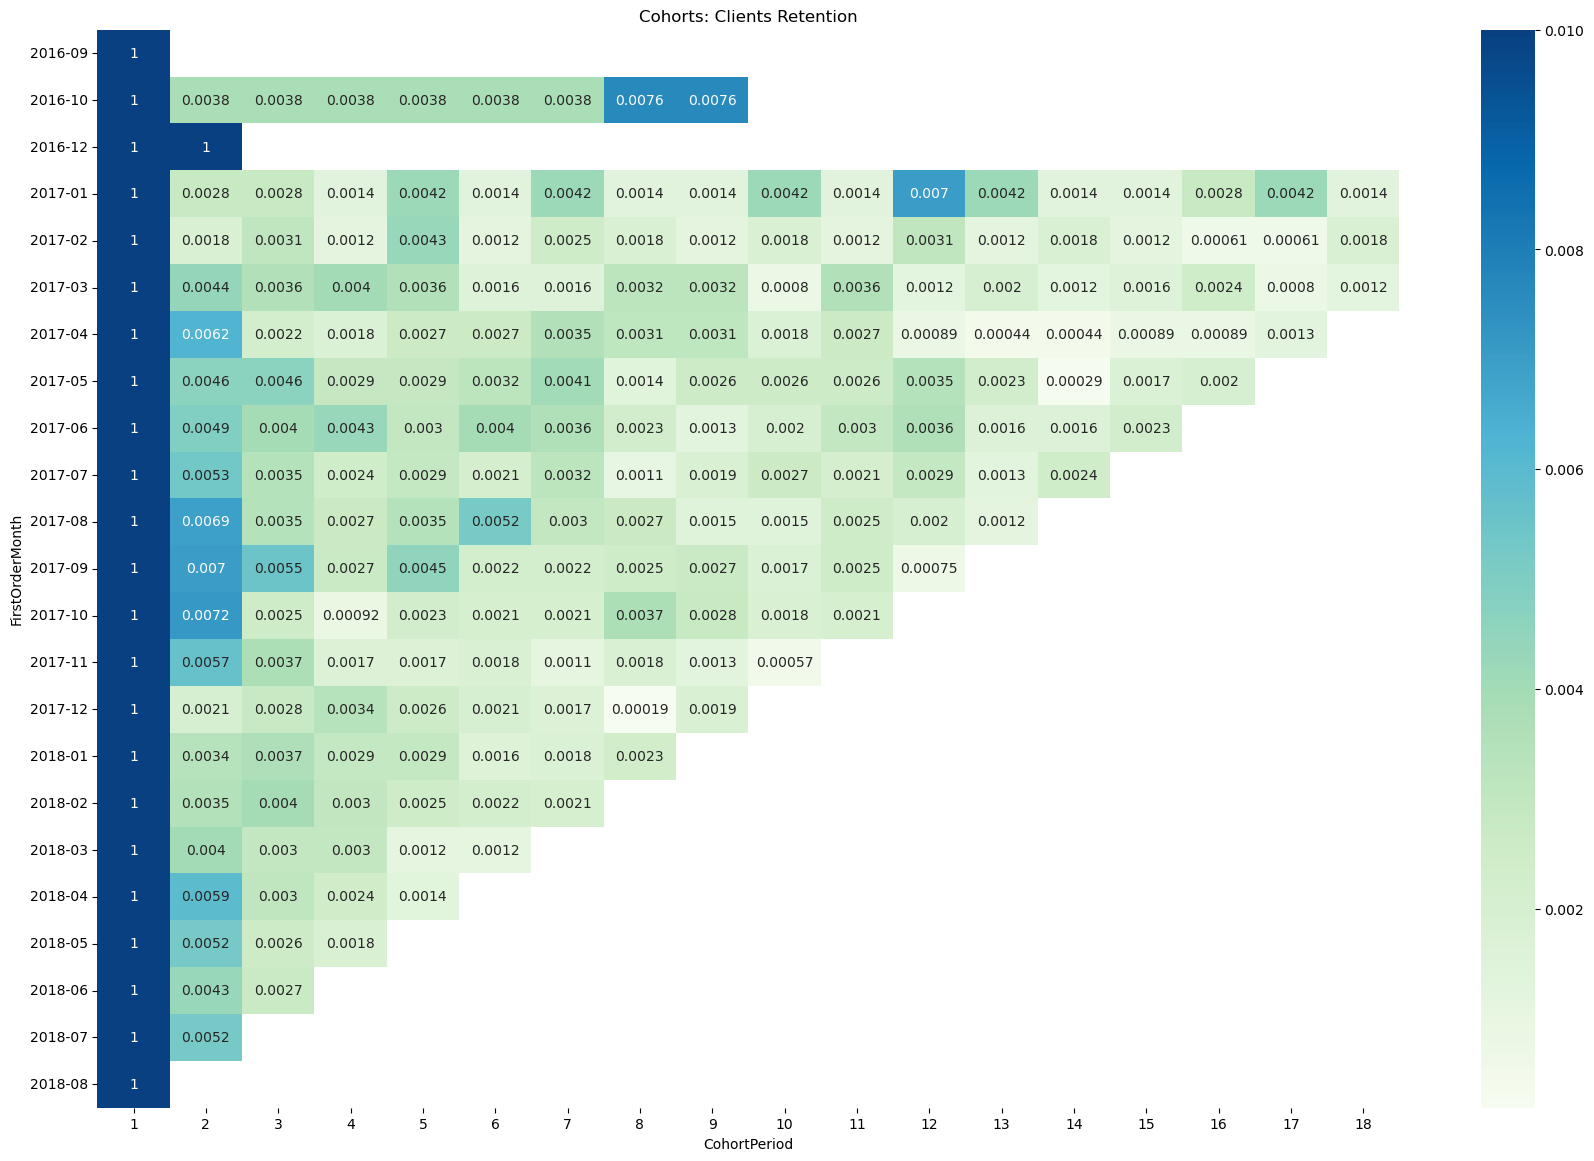

In [48]:
plt.figure(figsize=(21, 14))
plt.title('Cohorts: Clients Retention')
sns.heatmap(user_retention, vmax=0.01, annot=True, cmap="GnBu") 
# We specify the parameter vmax to indicate the maximum value up to which the color mapping is applied 
# (to avoid pale colors due to the fact that the first column equals 1).

The answer to the task is that the highest retention rate on the third month is observed for the cohort of customers who made their first purchase in **June 2017**.

## 6. "Frequently, for high-quality analysis of audience, segmentation-based methods are used. Use Python to perform RFM segmentation of customers in order to make a high-quality evaluation of the audience. For clustering, you can use the following metrics: R (Recency) - time elapsed since the last purchase before the current date, F (Frequency) - total number of purchases made over time, and M (Monetary) - total amount spent over time.

**Methodology**
> 1. Recency = number of days since last purchase
> 2. Freqency = number of purchases during the studied period (usually one year)
> 3. Monetary = total amount of purchases made during the studied period  

Main idea of RFM - analysis is to split customers base for segments (clusters) in 3 different planes. After that you make the matrix of RFM-scores for customers which provide special charachteristics. 


To conduct RFM segmentation, we will need data on customers, purchase date, and order value. For this, we will need all 3 datasets. We will combine them and remove unnecessary columns.

In [49]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [51]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [52]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


Before merging datasets, let's simplify our table with products and order price information, where the total price per order will be indicated.


In [53]:
items_2 = items.groupby('order_id', as_index=False) \
               .agg({'price' :'sum'}) 
items_2

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [54]:
items_2.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [55]:
orders1 = orders.merge(items_2, how='inner', on='order_id')
# i will make interjoin, for look only on orders thats have coincidence
df_orders = orders1[['order_id','customer_id','order_purchase_timestamp','price']] 
df_orders.head()

,order_id,customer_id,order_purchase_timestamp,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,19.90


Let's merge the resulting dataframe with the customers table and remove unnecessary columns, leaving only the necessary ones.

In [56]:
data = customers.merge(df_orders, how='inner', on='customer_id')
data = data[['customer_unique_id','order_id','order_purchase_timestamp','price']]
data = data.rename(columns={'order_purchase_timestamp':'date','customer_unique_id':'customer_id'})
data.head()

,customer_id,order_id,date,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00


Let's do an additional check on the total order amount from the original dataset and the one obtained during the transformations. The amounts match.

In [57]:
print(data.price.sum())
print(items.price.sum())

13591643.700000001
13591643.700000003


We will analyze the full time period available in the dataset, as there will be no tie to months and years. The segmentation will include rank indicators that will contain information in days, for example - the number of days since the last purchase.

In [59]:
print('Orders from {} to {}'.format(data['date'].min(), 
                                    data['date'].max()))
print(data['date'].max() - data['date'].min())

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57
728 days 11:51:38


In [60]:
period = 728

Let's model the situation as if we were segmenting users at the current moment. We will define the starting point as 'now' plus one day from the date of the last order.

In [63]:
now = data['date'].max() + dt.timedelta(days=1)
print(now)

2018-09-04 09:06:57


Let's calculate the values of Recency, Frequency, and Monetary for each customer.

Let's start with **Recency**, which shows how long ago a purchase (order) was made by each individual user, and define it as 'now' - the date of purchase. The obtained data will be recorded in the *DaysSinceOrder* column.

In [68]:
data['days_since_order'] = data['date'].apply(lambda x: (now - x).days)
data.head(3)

,customer_id,order_id,date,price,days_since_order
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,475
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,234
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,107


I will create a new dataframe where the data for each customer should be in one row, for this I will aggregate the data, for the recency metric we will take the minimum value from the 'days_since_order' column.

In [65]:
aggr = {
    'days_since_order': lambda x: x.min(),  # общее количество дней с момента посл заказа (Recency)
    'date': lambda x: len([d for d in x if d >= now - dt.timedelta(days=period)]), # общее количество заказов за последний период (Frequency)
}
rfm = data.groupby('customer_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 'date': 'Frequency'}, inplace=True)
rfm.head()

,customer_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1


Calculate the monetary value, the total turnover of orders for each customer for the entire period, by calculating the total amount of all purchases for each customer, grouping and aggregating by the sum column.

In [67]:
monetary = data.groupby('customer_id', as_index=False).agg({'price' : 'sum'})
monetary.head(3)

,customer_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.9
2,0000f46a3911fa3c0805444483337064,69.0


Merging with obtained early dataframe "rfm", before that will rename the column `price` to `Monetary`

In [69]:
monetary.rename(columns = {'price': 'Monetary'}, inplace=True)
print(monetary['Monetary'].sum())
print(data['price'].sum())   # check with 

13591643.700000001
13591643.700000001
